## Plotting Titanic Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a bar chart for number of passengers survived by class

In [3]:
titanic_survived = titanic[titanic['survived']==1]

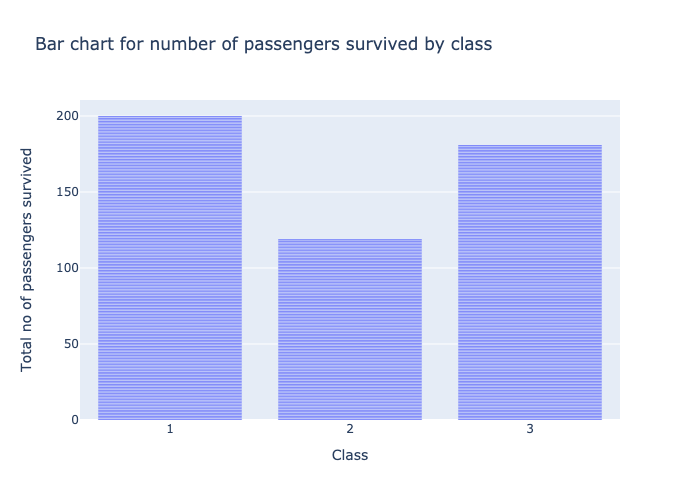

In [26]:
data = [go.Bar(
   x = titanic_survived['pclass'],
   y = titanic_survived['survived']
)]
fig = go.Figure(data=data)
fig.update_layout(
    title="Bar chart for number of passengers survived by class",
    xaxis_title="Class",
    yaxis_title="Total no of passengers survived",
)
fig.write_image("../images/titanic_survivors_by_class.png")
cases_bytes = fig.to_image(format="png")
Image(cases_bytes)

#### 2. Create a vertical bar chart for passengers survived by class and gender

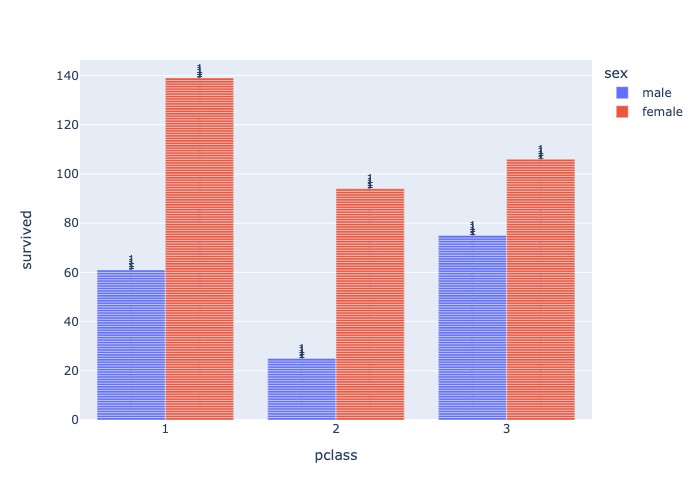

In [5]:
fig = px.bar(titanic_survived, x="pclass", y="survived",color="sex", text = "survived",barmode="group",
             category_orders={
                            "sex": ["male", "female"]})
fig.write_image("../images/titanic_survivors_by_class_gender.png")
cases_bytes = fig.to_image(format="png")
Image(cases_bytes)

#### 3. Create a stacked chart survived vs dead for different classes and gender

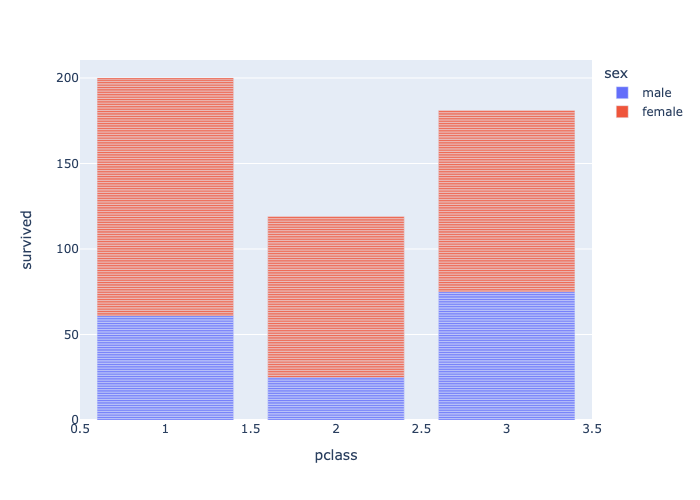

In [6]:
#suvived = titanic['survived']==1]
fig = px.bar(titanic_survived, x="pclass", y="survived",color="sex",
             category_orders={
                            "sex": ["male", "female"]})
fig.write_image("../images/titanic_survivors_by_class_gender.png")
cases_bytes = fig.to_image(format="png")
Image(cases_bytes)

#### 4. Plot histogram of fares paid for passengers bins = 30

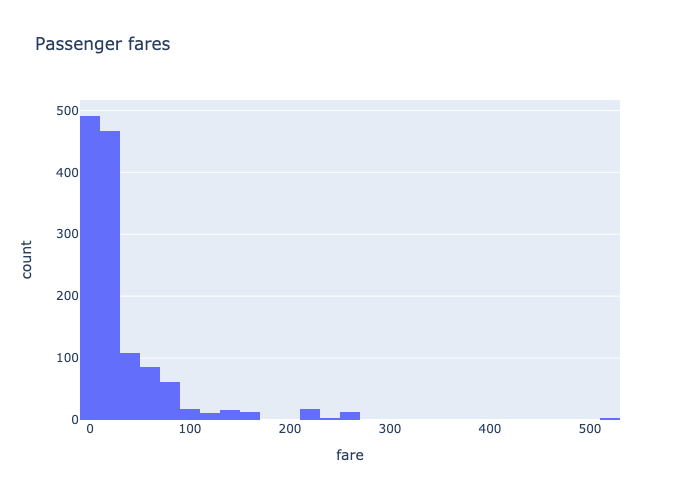

In [7]:
# new cases weekly trend
fig = px.histogram(titanic, x="fare", nbins = 30,
                 title="Passenger fares")

fig.write_image("../images/titanic_ticket_fare_hist.png")
cases_bytes = fig.to_image(format="png")
Image(cases_bytes)

#### 5.Create a KDE vs bar plot of the fare

In [8]:
titanic['fare'] = titanic['fare'].fillna(0)

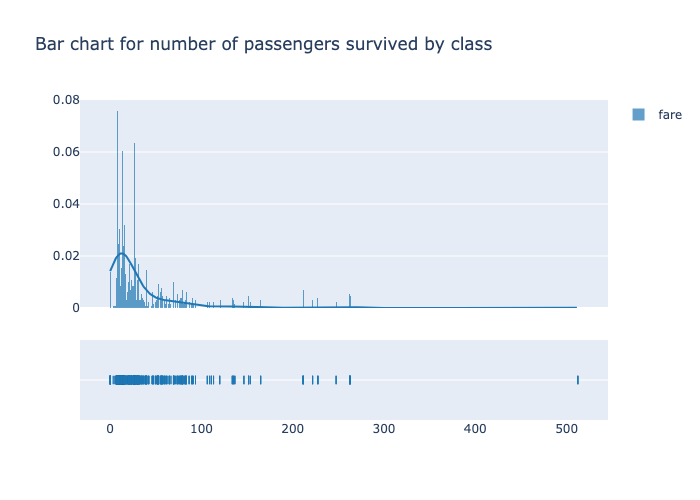

In [28]:
import plotly.figure_factory as ff
#df = px.data.tips()
group_labels=["fare"]
fig = ff.create_distplot([titanic["fare"]], group_labels)
#fig.update_layout()
fig.update_layout(
    yaxis_range=[0,0.08],
    title="Bar chart for number of passengers survived by class",)
fig.write_image("../images/titanic_kde.png")
kde = fig.to_image(format="png")
Image(kde)

#### 6. Create a box plot of the fares by passenger class

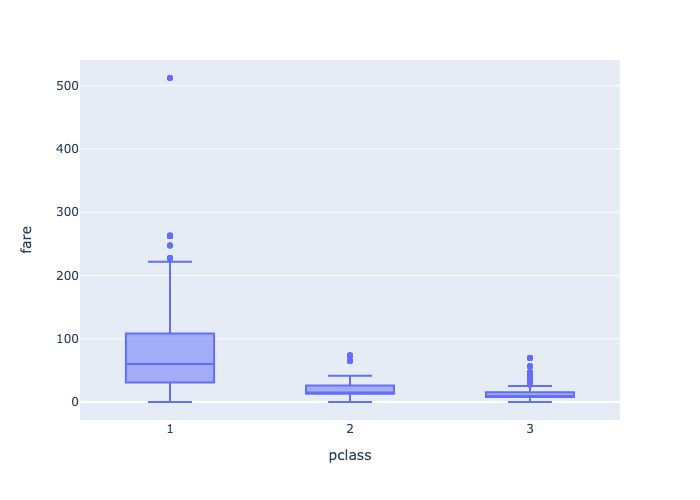

In [25]:
fig = px.box(titanic, x="pclass", y="fare")
fig.write_image("../images/box_plot.png")
box = fig.to_image(format="png")
Image(box)

#### 7. Create a box plot of the age by passenger class

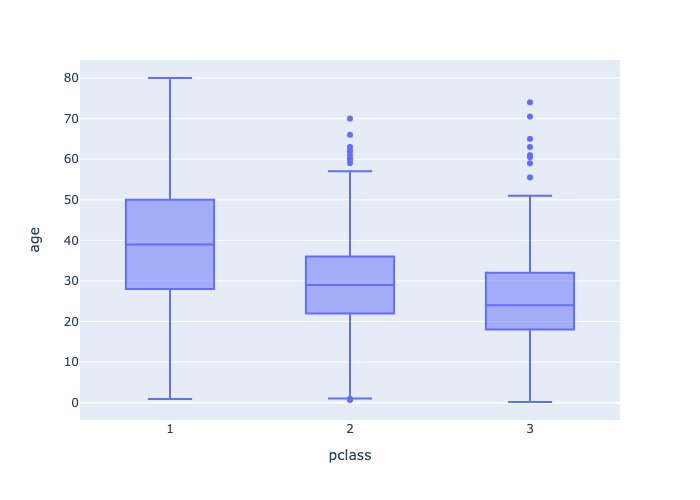

In [20]:
fig = px.box(titanic, x="pclass", y="age")
fig.write_image("../images/age.png")
box = fig.to_image(format="png")
Image(box)

#### Try Plotly to do all of the above